# CSC6711 Project 2 - Exploring Rec Sys Data

* **Author**: Jacob Buysse

This notebook is an analysis of four datasets for recommendation systems (all files are located in the `datasets` subdirectory):
* MovieLens - `movielens_25m.feather` (Movies)
* Netflix Prize - `netflix_prize.feather` (Movies and TV Shows)
* Yahoo! Music R2 - `yahoo_r2_songs.subsampled.feather` (Songs)
* BoardGameGeek - `boardgamegeek.feather` (Board Games)

We will be using the following libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

Let us configure matplotlib for readable labels, high resolution, and automatic layout.

In [2]:
matplotlib.rc('axes', labelsize=16)
matplotlib.rc('figure', dpi=150, autolayout=True)

## MovieLens Analysis

Let us inspect the MoveLens dataset.

In [4]:
df1 = pd.read_feather('./datasets/movielens_25m.feather')
df1

,item_id,user_id,rating
0,296,1,5.0
1,306,1,3.5
2,307,1,5.0
3,665,1,5.0
4,899,1,3.5
...,...,...,...
25000090,50872,162541,4.5
25000091,55768,162541,2.5
25000092,56176,162541,2.0
25000093,58559,162541,4.0


In [6]:
df1.describe()

,item_id,user_id,rating
count,2.489058e+07,2.489058e+07,2.489058e+07
mean,2.083573e+04,8.120344e+04,3.536225e+00
std,3.828946e+04,4.680652e+04,1.059729e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,1.196000e+03,4.051000e+04,3.000000e+00
50%,2.918000e+03,8.094800e+04,3.500000e+00
75%,8.446000e+03,1.215920e+05,4.000000e+00
max,2.087370e+05,1.625410e+05,5.000000e+00


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24890583 entries, 0 to 25000094
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   item_id  int64  
 1   user_id  int64  
 2   rating   float64
dtypes: float64(1), int64(2)
memory usage: 759.6 MB


So we have 24.9M ratings by item_id/user_id.  Ratings are from 0.5 to 5 (so assuming a star rating system where you can't give a zero-rating and where every record has a rating - so no nulls).

Let us see how many distinct items and users we have.

In [21]:
rating_count = df1.shape[0]
item_count = df1.item_id.nunique()
user_count = df1.user_id.nunique()
total_count = item_count * user_count
density = rating_count / total_count
print(f"{rating_count:,} total ratings")
print(f"{item_count:,} distinct item IDs")
print(f"{user_count:,} distinct user IDs")
print(f"{total_count:,} total possible ratings")
print(f"{density:.2%} density")

24,890,583 total ratings
24,330 distinct item IDs
162,541 distinct user IDs
3,954,622,530 total possible ratings
0.63% density


So there are around 24k different movies and 162k different users which makes this a sparse rating matrix (otherwise there would be around 4B ratings) of only 0.63% populated values.

In [35]:
df1_counts = df1.groupby('item_id')[['rating']].count()
df1_counts.describe()

,rating
count,24330.000000
mean,1023.040814
std,3780.192399
min,10.000000
25%,20.000000
50%,62.000000
75%,386.000000
max,81491.000000


We can see that the 24k items are represented in the groups with the fewest ratings being 10 and the most ratings being 81k.  The mean rating count is 1k +/- 3.7k.  The mean and standard deviation would be better represented on the log of the values (per the graph below).

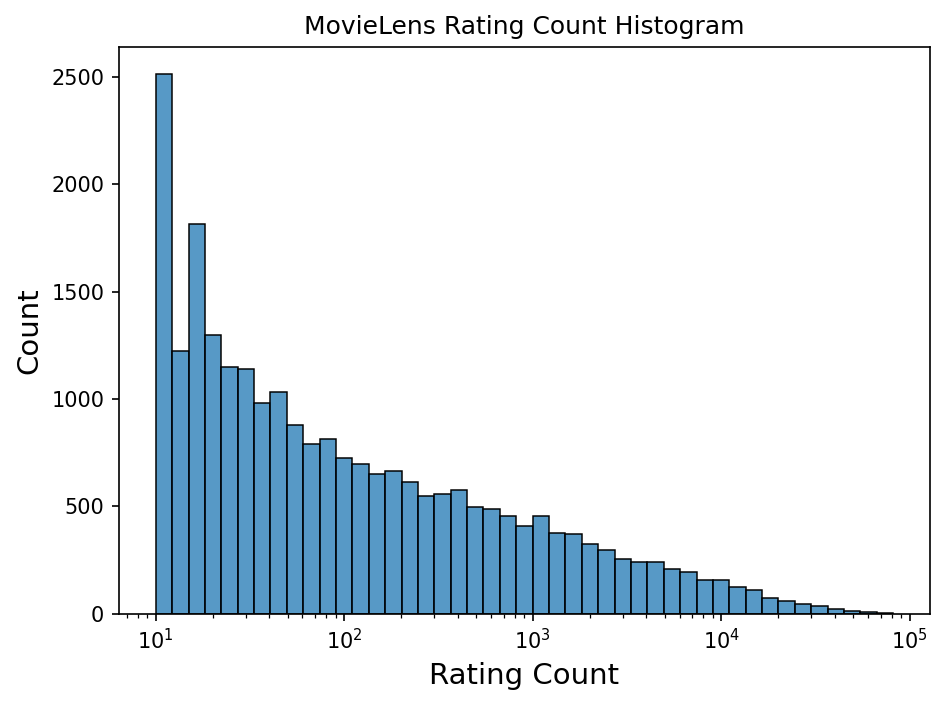

In [36]:
plot = sns.histplot(x=df1_counts['rating'], log_scale=True)
plot.set(title='MovieLens Rating Count Histogram', xlabel='Rating Count');

We can see that the most frequent count of ratings is around 10 with 2500 items falling in that range.  The top end is only one rating at just shy of 100k ratings (81k per the above table).  There is a nice hocky stick shape to this graph (we could eliminate the bump on the left side of the graph by changing the bin size, if we wanted to).

## Netflix Prize Analysis

Let us inspect the Netflix dataset.

In [37]:
df2 = pd.read_feather('./datasets/netflix_prize.feather')
df2

,item_id,user_id,rating
0,1,1488844,3
1,1,822109,5
2,1,885013,4
3,1,30878,4
4,1,823519,3
...,...,...,...
51031350,9210,2420260,1
51031351,9210,761176,3
51031352,9210,459277,3
51031353,9210,2407365,4


In [38]:
df2.describe()

,item_id,user_id,rating
count,5.103136e+07,5.103136e+07,5.103136e+07
mean,4.659441e+03,1.322400e+06,3.594161e+00
std,2.583608e+03,7.645480e+05,1.085369e+00
min,1.000000e+00,6.000000e+00,1.000000e+00
25%,2.452000e+03,6.611430e+05,3.000000e+00
50%,4.740000e+03,1.318880e+06,4.000000e+00
75%,6.829000e+03,1.984428e+06,4.000000e+00
max,9.210000e+03,2.649429e+06,5.000000e+00


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51031355 entries, 0 to 51031354
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   item_id  int64
 1   user_id  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 1.1 GB


So we have 51M ratings by item_id/user_id.  Ratings are from 1 to 5 (so assuming a star rating system where you can't give a zero-rating or a half star rating and where every record has a rating - so no nulls).

Let us see how many distinct items and users we have.

In [40]:
rating_count = df2.shape[0]
item_count = df2.item_id.nunique()
user_count = df2.user_id.nunique()
total_count = item_count * user_count
density = rating_count / total_count
print(f"{rating_count:,} total ratings")
print(f"{item_count:,} distinct item IDs")
print(f"{user_count:,} distinct user IDs")
print(f"{total_count:,} total possible ratings")
print(f"{density:.2%} density")

51,031,355 total ratings
9,210 distinct item IDs
478,018 distinct user IDs
4,402,545,780 total possible ratings
1.16% density


So there are only around 9k different movies and TV shows bute 478k different users which makes this a sparse rating matrix (otherwise there would be around 4.4B ratings) of only 1.16% populated values.

In [42]:
df2_counts = df2.groupby('item_id')[['rating']].count()
df2_counts.describe()

,rating
count,9210.000000
mean,5540.863735
std,16432.061634
min,10.000000
25%,188.000000
50%,553.000000
75%,2709.500000
max,232944.000000


We can see that the 9k items are represented in the groups with the fewest ratings being 10 and the most ratings being 232k.  The mean rating count is 5k +/- 16k.  The mean and standard deviation would be better represented on the log of the values (per the graph below).

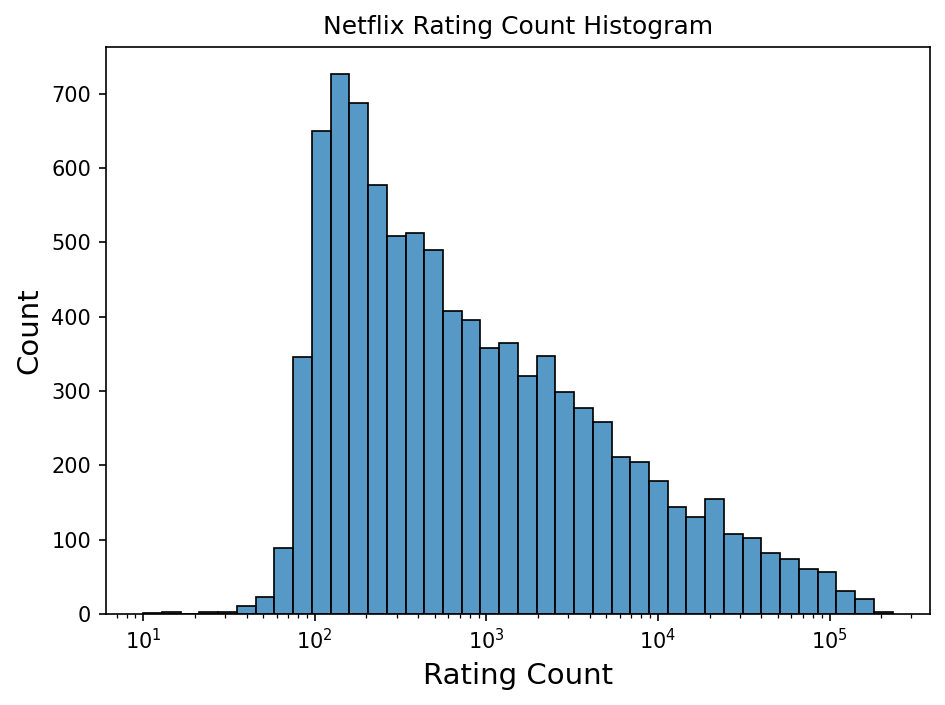

In [43]:
plot = sns.histplot(x=df2_counts['rating'], log_scale=True)
plot.set(title='Netflix Rating Count Histogram', xlabel='Rating Count');

This graph is more skewed towards the 100 rating count for items (around 700) with a steep leading edge and steady trailing edge.